In [5]:
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np

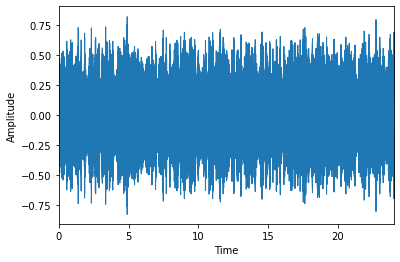

In [6]:
src_file = "sample.wav"

signal, sr = librosa.load(src_file, sr=44100)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [7]:
signal.shape

(1058400,)

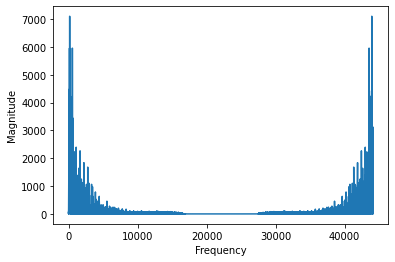

In [8]:
# performing the Fast fourier transformation
signal_fft = np.fft.fft(signal)
magnitude = np.abs(signal_fft)
frequency = np.linspace(0, sr, len(magnitude)) # 0 to 44100hz and number of items inbetween is the magnitude
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

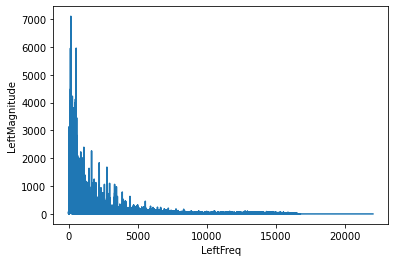

In [10]:
# as we can see that the left part is repreated after a specific time
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("LeftFreq")
plt.ylabel("LeftMagnitude")
plt.show()

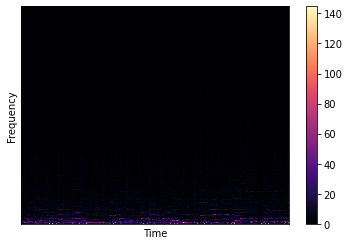

In [11]:
# now that we have  a snapshot of how the frequency are contributing, we need it wrt time
# stft -> short time fourier transform
n_fft = 2048 # number of samples
hop_length = 512 # amount we are shifting 
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length) # heatmap, x, y , colormap
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

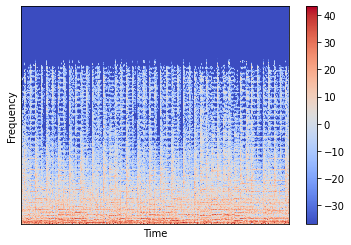

In [12]:
# instead of using amplitude, convert to db and show it
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

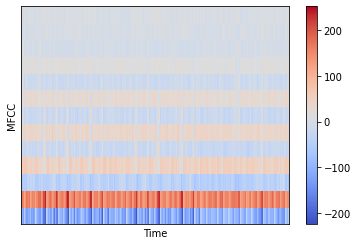

In [13]:
# calculaing the MFCC's
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()
# the y axis contains the 13 coefficients(13 rows)